# 1D Tensor

In [ ]:
!pip install torch torchvision

## Preparation

In [3]:
# These are the libraries will be used for this lab.

import torch 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  

Check PyTorch version:


In [4]:
torch.__version__

'2.5.1+cu124'

This is the function for plotting diagrams. You will use this function to plot the vectors in Coordinate system.


In [5]:
# Plot vecotrs, please keep the parameters in the same length
# @param: Vectors = [{"vector": vector variable, "name": name of vector, "color": color of the vector on diagram}]
    
def plotVec(vectors):
    ax = plt.axes()
    
    # For loop to draw the vectors
    for vec in vectors:
        ax.arrow(0, 0, *vec["vector"], head_width = 0.05,color = vec["color"], head_length = 0.1)
        plt.text(*(vec["vector"] + 0.1), vec["name"])
    
    plt.ylim(-2,2)
    plt.xlim(-2,2)

<!--Empty Space for separating topics-->


<h2 id="Types_Shape">Types and Shape</h2>


You can find the type of the following list of integers <i>[0, 1, 2, 3, 4]</i> by applying the constructor <code>torch.tensor()</code>:


In [6]:
# Convert a integer list with length 5 to a tensor

ints_to_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The dtype of tensor object after converting it to tensor: ", ints_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", ints_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.int64
The type of tensor object after converting it to tensor:  torch.LongTensor


As a result, the integer list has been converted to a long tensor.


The Python type is still <code>torch.Tensor</code>:


In [7]:
type(ints_to_tensor)

torch.Tensor

<!--Empty Space for separate topics-->


You can find the type of this float list <i>[0.0, 1.0, 2.0, 3.0, 4.0]</i> by applying the method <code>torch.tensor()</code>:


In [8]:
# Convert a float list with length 5 to a tensor

floats_to_tensor = torch.tensor([0.0, 1.0, 2.0, 3.0, 4.0])
print("The dtype of tensor object after converting it to tensor: ", floats_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", floats_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.float32
The type of tensor object after converting it to tensor:  torch.FloatTensor


The float list is converted to a float tensor.


In [9]:
list_floats=[0.0, 1.0, 2.0, 3.0, 4.0]

floats_int_tensor=torch.tensor(list_floats,dtype=torch.int64)

/tmp/ipykernel_314297/4127359589.py:3: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  floats_int_tensor=torch.tensor(list_floats,dtype=torch.int64)


In [10]:
print("The dtype of tensor object is: ", floats_int_tensor.dtype)
print("The type of tensor object is: ", floats_int_tensor.type())

The dtype of tensor object is:  torch.int64
The type of tensor object is:  torch.LongTensor


<b>Note: The elements in the list that will be converted to tensor must have the same type.</b>


<!--Empty Space for separating topics-->


From the previous examples, you see that <code>torch.tensor()</code> converts the list to the tensor type, which is similar to the original list type. However, what if you want to convert the list to a certain tensor type? <code>torch</code> contains the methods required to do this conversion. The following code  converts an integer list to float tensor:


In [11]:
# Convert a integer list with length 5 to float tensor

new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])
new_float_tensor.type()
print("The type of the new_float_tensor:", new_float_tensor.type())

The type of the new_float_tensor: torch.FloatTensor


In [12]:
new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])

<!--Empty Space for separating topics-->


You can also convert an existing tensor object (<code><i>tensor_obj</i></code>) to another tensor type. Convert the integer tensor to a float tensor:


In [13]:
# Another method to convert the integer list to float tensor

old_int_tensor = torch.tensor([0, 1, 2, 3, 4])
new_float_tensor = old_int_tensor.type(torch.FloatTensor)
print("The type of the new_float_tensor:", new_float_tensor.type())

The type of the new_float_tensor: torch.FloatTensor


<!--Empty Space for separating topics-->


The <code><i>tensor_obj</i>.size()</code> helps you to find out the size of the <code><i>tensor_obj</i></code>.
The <code><i>tensor_obj</i>.ndimension()</code> shows the dimension of the tensor object.


In [14]:
# Introduce the tensor_obj.size() & tensor_ndimension.size() methods

print("The size of the new_float_tensor: ", new_float_tensor.size())
print("The dimension of the new_float_tensor: ",new_float_tensor.ndimension())

The size of the new_float_tensor:  torch.Size([5])
The dimension of the new_float_tensor:  1


<!--Empty Space for separating topics-->


The <code><i>tensor_obj</i>.view(<i>row, column</i>)</code> is used for reshaping a tensor object.<br>


What if you have a tensor object with <code>torch.Size([5])</code> as a <code>new_float_tensor</code> as shown in the previous example?<br>
After you execute <code>new_float_tensor.view(5, 1)</code>, the size of <code>new_float_tensor</code> will be <code>torch.Size([5, 1])</code>.<br>
This means that the tensor object <code>new_float_tensor</code> has been reshaped from a one-dimensional  tensor object with 5 elements to a two-dimensional tensor object with 5 rows and 1 column.


In [15]:
# Introduce the tensor_obj.view(row, column) method

twoD_float_tensor = new_float_tensor.view(5, 1)
print("Original Size: ", new_float_tensor.size())
print("Size after view method", twoD_float_tensor.size())

Original Size:  torch.Size([5])
Size after view method torch.Size([5, 1])


Note that the original size is 5. The tensor after reshaping becomes a 5X1 tensor analog to a column vector.


<b>Note: The number of elements in a tensor must remain constant after applying view.</b>


<!--Empty Space for separating topics-->


What if you have a tensor with dynamic size but you want to reshape it? You can use <b>-1</b> to do just that.


In [16]:
# Introduce the use of -1 in tensor_obj.view(row, column) method

twoD_float_tensor = new_float_tensor.view(-1, 1)
print("Original Size: ", new_float_tensor.size())
print("Size after view method", twoD_float_tensor.size())

Original Size:  torch.Size([5])
Size after view method torch.Size([5, 1])


You get the same result as the previous example. The <b>-1</b> can represent any size. However, be careful because you can set only one argument as <b>-1</b>.


<!--Empty Space for separating topics-->


You can also convert a <b>numpy</b> array to a <b>tensor</b>, for example: 


In [17]:
# Convert a numpy array to a tensor

numpy_array = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
new_tensor = torch.from_numpy(numpy_array)

print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor


<!--Empty Space for separating topics-->


Converting a <b>tensor</b> to a <b>numpy</b> is also supported in PyTorch. The syntax is shown below:


In [18]:
# Convert a tensor to a numpy array

back_to_numpy = new_tensor.numpy()
print("The numpy array from tensor: ", back_to_numpy)
print("The dtype of numpy array: ", back_to_numpy.dtype)

The numpy array from tensor:  [0. 1. 2. 3. 4.]
The dtype of numpy array:  float64


<code>back_to_numpy</code> and <code>new_tensor</code> still point to <code>numpy_array</code>. As a result if we change <code>numpy_array</code> both <code>back_to_numpy</code> and <code>new_tensor</code> will change. For example if we set all the elements in <code>numpy_array</code> to zeros, <code>back_to_numpy</code> and <code> new_tensor</code> will follow suit.


In [19]:
# Set all elements in numpy array to zero 
numpy_array[:] = 0
print("The new tensor points to numpy_array : ", new_tensor)
print("and back to numpy array points to the tensor: ", back_to_numpy)

The new tensor points to numpy_array :  tensor([0., 0., 0., 0., 0.], dtype=torch.float64)
and back to numpy array points to the tensor:  [0. 0. 0. 0. 0.]


<!--Empty Space for separating topics-->


<b>Pandas Series</b> can also be converted by using the numpy array that is stored in <code>pandas_series.values</code>. Note that <code>pandas_series</code> can be any pandas_series object. 


In [20]:
# Convert a panda series to a tensor

pandas_series=pd.Series([0.1, 2, 0.3, 10.1])
new_tensor=torch.from_numpy(pandas_series.values)
print("The new tensor from numpy array: ", new_tensor)
print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

The new tensor from numpy array:  tensor([ 0.1000,  2.0000,  0.3000, 10.1000], dtype=torch.float64)
The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor


consider the following tensor 


In [21]:
this_tensor=torch.tensor([0,1, 2,3]) 

The method <code>item()</code> returns the value of this tensor as a standard Python number. This only works for one element. 


In [22]:
this_tensor=torch.tensor([0,1, 2,3]) 

print("the first item is given by",this_tensor[0].item(),"the first tensor value is given by ",this_tensor[0])
print("the second item is given by",this_tensor[1].item(),"the second tensor value is given by ",this_tensor[1])
print("the third  item is given by",this_tensor[2].item(),"the third tensor value is given by ",this_tensor[2])

the first item is given by 0 the first tensor value is given by  tensor(0)
the second item is given by 1 the second tensor value is given by  tensor(1)
the third  item is given by 2 the third tensor value is given by  tensor(2)


we can use the method <code> tolist()</code> to return a list 


In [23]:
torch_to_list=this_tensor.tolist()

print('tensor:', this_tensor,"\nlist:",torch_to_list)

tensor: tensor([0, 1, 2, 3]) 
list: [0, 1, 2, 3]


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Try to convert <code>your_tensor</code> to a 1X5 tensor.


In [24]:
# Practice: convert the following tensor to a tensor object with 1 row and 5 columns

your_tensor = torch.tensor([1, 2, 3, 4, 5])

Double-click <b>here</b> for the solution.
<!-- 
your_new_tensor = your_tensor.view(1, 5)
print("Original Size: ",  your_tensor.size())
print("Size after view method", your_new_tensor.size())
-->


<!--Empty Space for separating topics-->


<h2 id="Index_Slice">Indexing and Slicing</h2>


In Python, <b>the index starts with 0</b>. Therefore, the last index will always be 1 less than the length of the tensor object.
You can access the value on a certain index by using the square bracket, for example:


In [25]:
# A tensor for showing how the indexs work on tensors

index_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The value on index 0:",index_tensor[0])
print("The value on index 1:",index_tensor[1])
print("The value on index 2:",index_tensor[2])
print("The value on index 3:",index_tensor[3])
print("The value on index 4:",index_tensor[4])

The value on index 0: tensor(0)
The value on index 1: tensor(1)
The value on index 2: tensor(2)
The value on index 3: tensor(3)
The value on index 4: tensor(4)


<b>Note that the <code>index_tensor[5]</code> will create an error.</b>


<!--Empty Space for separating topics-->


The index is shown in the following figure: 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/idex_1.png" width="500" alt="Python Index">


<!--Empty Space for separating topics-->


Now, you'll see how to change the values on certain indexes.


Suppose you have a tensor as shown here: 


In [26]:
# A tensor for showing how to change value according to the index

tensor_sample = torch.tensor([20, 1, 2, 3, 4])

Assign the value on index 0 as 100:


In [27]:
# Change the value on the index 0 to 100

print("Inital value on index 0:", tensor_sample[0])
tensor_sample[0] = 100
print("Modified tensor:", tensor_sample)

Inital value on index 0: tensor(20)
Modified tensor: tensor([100,   1,   2,   3,   4])


As you can see, the value on index 0 changes. Change the value on index 4 to 0:


In [28]:
# Change the value on the index 4 to 0

print("Inital value on index 4:", tensor_sample[4])
tensor_sample[4] = 0
print("Modified tensor:", tensor_sample)

Inital value on index 4: tensor(4)
Modified tensor: tensor([100,   1,   2,   3,   0])


The value on index 4 turns to 0.


<!--Empty Space for separating topics-->


If you are familiar with Python, you know that there is a feature called slicing on a list. Tensors support the same feature. 


Get the subset of <code>tensor_sample</code>. The subset should contain the values in <code>tensor_sample</code> from index 1 to index 3.


In [29]:
# Slice tensor_sample

subset_tensor_sample = tensor_sample[1:4]
print("Original tensor sample: ", tensor_sample)
print("The subset of tensor sample:", subset_tensor_sample)

Original tensor sample:  tensor([100,   1,   2,   3,   0])
The subset of tensor sample: tensor([1, 2, 3])


As a result, the <code>subset_tensor_sample</code> returned only the values on index 1, index 2, and index 3. Then, it stored them in a <code>subset_tensor_sample</code>.


<b>Note: The number on the left side of the colon represents the index of the first value. The number on the right side of the colon is always 1 larger than the index of the last value. For example, <code>tensor_sample[1:4]</code> means you get values from the index 1 to index 3 <i>(4-1)</i></b>.


<!--Empty Space for separating topics-->


As for assigning values to the certain index, you can also assign the value to the slices:


Change the value of <code>tensor_sample</code> from index 3 to index 4:


In [30]:
# Change the values on index 3 and index 4

print("Inital value on index 3 and index 4:", tensor_sample[3:5])
tensor_sample[3:5] = torch.tensor([300.0, 400.0])
print("Modified tensor:", tensor_sample)

Inital value on index 3 and index 4: tensor([3, 0])
Modified tensor: tensor([100,   1,   2, 300, 400])


The values on both index 3 and index 4 were changed. The values on other indexes remain the same.


<!--Empty Space for separating topics-->


You can also use a variable to contain the selected indexes and pass that variable to a tensor slice operation as a parameter, for example:  


In [31]:
# Using variable to contain the selected index, and pass it to slice operation

selected_indexes = [3, 4]
subset_tensor_sample = tensor_sample[selected_indexes]
print("The inital tensor_sample", tensor_sample)
print("The subset of tensor_sample with the values on index 3 and 4: ", subset_tensor_sample)

The inital tensor_sample tensor([100,   1,   2, 300, 400])
The subset of tensor_sample with the values on index 3 and 4:  tensor([300, 400])


<!--Empty Space for separating topics-->


You can also assign one value to the selected indexes by using the variable. For example, assign 100,000 to all the <code>selected_indexes</code>:


In [32]:
#Using variable to assign the value to the selected indexes

print("The inital tensor_sample", tensor_sample)
selected_indexes = [1, 3]
tensor_sample[selected_indexes] = 100000
print("Modified tensor with one value: ", tensor_sample)

The inital tensor_sample tensor([100,   1,   2, 300, 400])
Modified tensor with one value:  tensor([   100, 100000,      2, 100000,    400])


The values on index 1 and index 3 were changed to 100,000. Others remain the same.


<b>Note: You can use only one value for the assignment.</b>


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Try to change the values on index 3, 4, 7 of the following tensor to 0.


In [33]:
# Practice: Change the values on index 3, 4, 7 to 0

practice_tensor = torch.tensor([2, 7, 3, 4, 6, 2, 3, 1, 2])

Double-click <b>here</b> for the solution.
<!-- 
selected_indexes = [3, 4, 7]
practice_tensor[selected_indexes] = 0
print("New Practice Tensor: ", practice_tensor)
-->


<!--Empty Space for separating topics-->


<!-- <h2 id="Tensor_Func">Tensor Functions</h2>
 -->
 ## Tensor Functions


For this section, you'll work with some methods that you can apply to tensor objects.


<h3>Mean and Standard Deviation</h3>


You'll review the mean and standard deviation methods first. They are two basic statistical methods.


<!--Empty Space for separating topics-->


Create a tensor with values <i>[1.0, -1, 1, -1]</i>:


In [34]:
# Sample tensor for mathmatic calculation methods on tensor

math_tensor = torch.tensor([1.0, -1.0, 1, -1])
print("Tensor example: ", math_tensor)

Tensor example:  tensor([ 1., -1.,  1., -1.])


<!--Empty Space for separating topics-->


Here is the mean method:  


In [35]:
#Calculate the mean for math_tensor

mean = math_tensor.mean()
print("The mean of math_tensor: ", mean)

The mean of math_tensor:  tensor(0.)


<!--Empty Space for separating topics-->


The standard deviation can also be calculated by using <code><i>tensor_obj</i>.std()</code>:


In [36]:
#Calculate the standard deviation for math_tensor

standard_deviation = math_tensor.std()
print("The standard deviation of math_tensor: ", standard_deviation)

The standard deviation of math_tensor:  tensor(1.1547)


<!--Empty Space for separating topics-->


<h3>Max and Min</h3>


Now, you'll review another two useful methods: <code><i>tensor_obj</i>.max()</code> and <code><i>tensor_obj</i>.min()</code>. These two methods are used for finding the maximum value and the minimum value in the tensor.


<!--Empty Space for separating topics-->


Create a <code>max_min_tensor</code>: 


In [37]:
# Sample for introducing max and min methods

max_min_tensor = torch.tensor([1, 1, 3, 5, 5])
print("Tensor example: ", max_min_tensor)

Tensor example:  tensor([1, 1, 3, 5, 5])


<b>Note: There are two minimum numbers as 1 and two maximum numbers as 5 in the tensor. Can you guess how PyTorch is going to deal with the duplicates?</b>


<!--Empty Space for separating topics-->


Apply <code><i>tensor_obj</i>.max()</code> on <code>max_min_tensor</code>:


In [38]:
# Method for finding the maximum value in the tensor

max_val = max_min_tensor.max()
print("Maximum number in the tensor: ", max_val)

Maximum number in the tensor:  tensor(5)


The answer is <code>tensor(5)</code>. Therefore, the method <code><i>tensor_obj</i>.max()</code> is grabbing the maximum value but not the elements that contain the maximum value in the tensor.


In [39]:
 max_min_tensor.max()

tensor(5)

<!--Empty Space for separating topics-->


Use <code><i>tensor_obj</i>.min()</code> on <code>max_min_tensor</code>:


In [40]:
# Method for finding the minimum value in the tensor

min_val = max_min_tensor.min()
print("Minimum number in the tensor: ", min_val)

Minimum number in the tensor:  tensor(1)


The answer is <code>tensor(1)</code>. Therefore, the method <code><i>tensor_obj</i>.min()</code> is grabbing the minimum value but not the elements that contain the minimum value in the tensor.


<!--Empty Space for separating topics-->


<h3>Sin</h3>


Sin is the trigonometric function of an angle. Again, you will not be introducedvto any mathematic functions. You'll focus on Python.


<!--Empty Space for separating topics-->


Create a tensor with 0, π/2 and π. Then, apply the sin function on the tensor. Notice here that the <code>sin()</code> is not a method of tensor object but is a function of torch:


In [41]:
# Method for calculating the sin result of each element in the tensor

pi_tensor = torch.tensor([0, np.pi/2, np.pi])
sin = torch.sin(pi_tensor)
print("The sin result of pi_tensor: ", sin)

The sin result of pi_tensor:  tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])


The resultant tensor <code>sin</code> contains the result of the <code>sin</code> function applied to each element in the <code>pi_tensor</code>.<br>
This is different from the previous methods. For <code><i>tensor_obj</i>.mean()</code>, <code><i>tensor_obj</i>.std()</code>, <code><i>tensor_obj</i>.max()</code>, and <code><i>tensor_obj</i>.min()</code>, the result is a tensor with only one number because these are aggregate methods.<br>
However, the <code>torch.sin()</code> is not. Therefore, the resultant tensors have the same length as the input tensor.


<!--Empty Space for separating topics-->


<h3>Create Tensor by <code>torch.linspace()</code></h3>


A useful function for plotting mathematical functions is <code>torch.linspace()</code>. <code>torch.linspace()</code> returns evenly spaced numbers over a specified interval. You specify the starting point of the sequence and the ending point of the sequence. The parameter <code>steps</code> indicates the number of samples to generate. Now, you'll work with <code>steps = 5</code>.


In [42]:
# First try on using linspace to create tensor

len_5_tensor = torch.linspace(-2, 2, steps = 5)
print ("First Try on linspace", len_5_tensor)

First Try on linspace tensor([-2., -1.,  0.,  1.,  2.])


<!--Empty Space for separating topics-->


Assign <code>steps</code> with 9:


In [43]:
# Second try on using linspace to create tensor

len_9_tensor = torch.linspace(-2, 2, steps = 9)
print ("Second Try on linspace", len_9_tensor)

Second Try on linspace tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])


<!--Empty Space for separating topics-->


Use both <code>torch.linspace()</code> and <code>torch.sin()</code> to construct a tensor that contains the 100 sin result in range from 0 (0 degree) to 2π (360 degree): 


In [44]:
# Construct the tensor within 0 to 360 degree

pi_tensor = torch.linspace(0, 2*np.pi, 100)
sin_result = torch.sin(pi_tensor)

Plot the result to get a clearer picture. You must cast the tensor to a numpy array before plotting it.


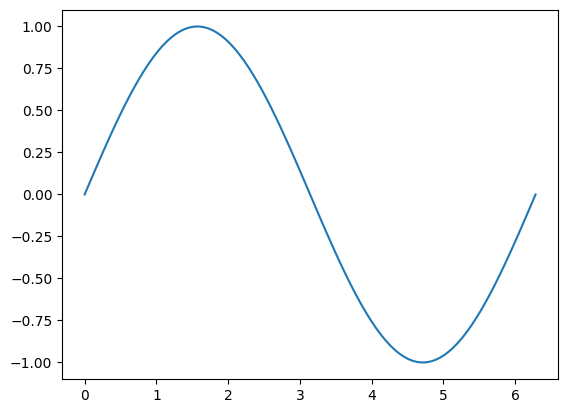

In [45]:
# Plot sin_result

plt.plot(pi_tensor.numpy(), sin_result.numpy())

If you know the trigonometric function, you will notice this is the diagram of the sin result in the range 0 to 360 degrees.


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Construct a tensor with 25 steps in the range 0 to π/2. Print out the Maximum and Minimum number. Also, plot  a graph showing the diagram that shows the result.


In [46]:
# Practice: Create your tensor, print max and min number, plot the sin result diagram

# Type your code here

Double-click <b>here</b> for the solution.
<!-- 
pi_tensor = torch.linspace(0, np.pi/2, 100)
print("Max Number: ", pi_tensor.max())
print("Min Number", pi_tensor.min())
sin_result = torch.sin(pi_tensor)
plt.plot(pi_tensor.numpy(), sin_result.numpy())
-->


<!--Empty Space for separating topics-->


<!-- <h2 id="Tensor_Op">Tensor Operations</h2>
 -->
 ## Tensor Operations


In the following section, you'll work with operations that you can apply to a tensor.


<!--Empty Space for separating topics-->


<h3>Tensor Addition</h3>


You can perform addition between two tensors.


Create a tensor <code>u</code> with 1 dimension and 2 elements. Then, create another tensor <code>v</code> with the same number of dimensions and the same number of elements:


In [47]:
# Create two sample tensors

u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

Add <code>u</code> and <code>v</code> together:


In [48]:
# Add u and v

w = u + v
print("The result tensor: ", w)

The result tensor:  tensor([1, 1])


The result is <code>tensor([1, 1])</code>. The behavior is <i>[1 + 0, 0 + 1]</i>.


Plot the result to to get a clearer picture.


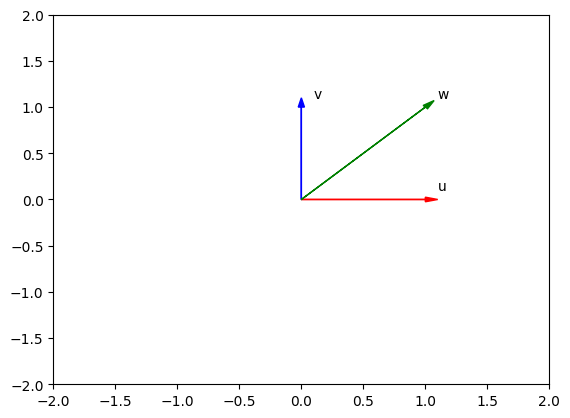

In [49]:
# Plot u, v, w

plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'},
    {"vector": w.numpy(), "name": 'w', "color": 'g'}
])

<!--Empty Space for separating topics-->


<h3>Try</h3> 


Implement the tensor subtraction with <code>u</code> and <code>v</code> as u-v.


In [50]:
# Try by yourself to get a result of u-v

u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

Double-click <b>here</b> for the solution.
<!--
print("The result tensor: ", u-v)
-->


Tensors must be of the same data type to perform addition as well as other operations.If you uncomment the  following code and try to run it you will get an error as the two tensors are of two different data types. **NOTE This lab was created on a older PyTorch version so in the current version we are using this is possible and will produce a float64 tensor.**


In [51]:
#torch.tensor([1,2,3],dtype=torch.int64)+torch.tensor([1,2,3],dtype=torch.float64)

<!--Empty Space for separating topics-->


You can add a scalar to the tensor. Use <code>u</code> as the sample tensor:


In [52]:
# tensor + scalar

u = torch.tensor([1, 2, 3, -1])
v = u + 1
print ("Addition Result: ", v)

Addition Result:  tensor([2, 3, 4, 0])


The result is simply adding 1 to each element in tensor <code>u</code> as shown in the following image:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/brodcasting.gif" width="500" alt="tensor addition">


<!--Empty Space for separating topics-->


<h3>Tensor Multiplication </h3>


Now, you'll review the multiplication between a tensor and a scalar.


Create a tensor with value <code>[1, 2]</code> and then multiply it by 2:


In [53]:
# tensor * scalar

u = torch.tensor([1, 2])
v = 2 * u
print("The result of 2 * u: ", v)

The result of 2 * u:  tensor([2, 4])


The result is <code>tensor([2, 4])</code>, so the code <code>2 * u</code> multiplies each element in the tensor by 2. This is how you get the product between a vector or matrix and a scalar in linear algebra.


<!--Empty Space for separating topics-->


You can use multiplication between two tensors.


Create two tensors <code>u</code> and <code>v</code> and then multiply them together:


In [54]:
# tensor * tensor

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])
w = u * v
print ("The result of u * v", w)

The result of u * v tensor([3, 4])


The result is simply <code>tensor([3, 4])</code>. This result is achieved by multiplying every element in <code>u</code> with the corresponding element in the same position <code>v</code>, which is similar to <i>[1 * 3, 2 * 2]</i>.


<!--Empty Space for separating topics-->


<h3>Dot Product</h3>


The dot product is a special operation for a vector that you can use in Torch.


Here is the dot product of the two tensors <code>u</code> and <code>v</code>:


In [55]:
# Calculate dot product of u, v

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])

print("Dot Product of u, v:", torch.dot(u,v))

Dot Product of u, v: tensor(7)


The result is <code>tensor(7)</code>. The function is <i>1 x 3 + 2 x 2 = 7</i>.


# 2D Tensor

<h2 id="Types_Shape">Types and Shape</h2>


The methods and types for 2D tensors is similar to the methods and types for 1D tensors which has been introduced in <i>Previous Lab</i>.


Let us see how to convert a 2D list to a 2D tensor. First, let us create a 3X3 2D tensor. Then let us try to use <code>torch.tensor()</code> which we used for converting a 1D list to 1D tensor. Is it going to work?


In [56]:
# Convert 2D List to 2D Tensor

twoD_list = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]
twoD_tensor = torch.tensor(twoD_list)
print("The New 2D Tensor: ", twoD_tensor)

The New 2D Tensor:  tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])


Bravo! The method <code>torch.tensor()</code> works perfectly.Now, let us try other functions we studied in the <i>Previous Lab</i>.


<!--Empty Space for separating topics-->


Let us try <code><i>tensor_obj</i>.ndimension()</code> (<code>tensor_obj</code>: This can be any tensor object), <code><i>tensor_obj</i>.shape</code>, and <code><i>tensor_obj</i>.size()</code>


In [57]:
# Try tensor_obj.ndimension(), tensor_obj.shape, tensor_obj.size()

print("The dimension of twoD_tensor: ", twoD_tensor.ndimension())
print("The shape of twoD_tensor: ", twoD_tensor.shape)
print("The shape of twoD_tensor: ", twoD_tensor.size())
print("The number of elements in twoD_tensor: ", twoD_tensor.numel())

The dimension of twoD_tensor:  2
The shape of twoD_tensor:  torch.Size([3, 3])
The shape of twoD_tensor:  torch.Size([3, 3])
The number of elements in twoD_tensor:  9


Because it is a 2D 3X3 tensor,  the outputs are correct.


<!--Empty Space for separating topics-->


Now, let us try converting the tensor to a numpy array and convert the numpy array back to a tensor.


In [58]:
# Convert tensor to numpy array; Convert numpy array to tensor

twoD_numpy = twoD_tensor.numpy()
print("Tensor -> Numpy Array:")
print("The numpy array after converting: ", twoD_numpy)
print("Type after converting: ", twoD_numpy.dtype)

print("================================================")

new_twoD_tensor = torch.from_numpy(twoD_numpy)
print("Numpy Array -> Tensor:")
print("The tensor after converting:", new_twoD_tensor)
print("Type after converting: ", new_twoD_tensor.dtype)

Tensor -> Numpy Array:
The numpy array after converting:  [[11 12 13]
 [21 22 23]
 [31 32 33]]
Type after converting:  int64
Numpy Array -> Tensor:
The tensor after converting: tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Type after converting:  torch.int64


The result shows the tensor has successfully been converted to a numpy array and then converted back to a tensor.


<!--Empty Space for separating topics-->


Now let us try to convert a Pandas Dataframe to a tensor. The process is the  Same as the 1D conversion, we can obtain the numpy array via the attribute <code>values</code>. Then, we can use <code>torch.from_numpy()</code> to convert the value of the Pandas Series to a tensor.


In [59]:
# Try to convert the Panda Dataframe to tensor

df = pd.DataFrame({'a':[11,21,31],'b':[12,22,312]})

print("Pandas Dataframe to numpy: ", df.values)
print("Type BEFORE converting: ", df.values.dtype)

print("================================================")

new_tensor = torch.from_numpy(df.values)
print("Tensor AFTER converting: ", new_tensor)
print("Type AFTER converting: ", new_tensor.dtype)

Pandas Dataframe to numpy:  [[ 11  12]
 [ 21  22]
 [ 31 312]]
Type BEFORE converting:  int64
Tensor AFTER converting:  tensor([[ 11,  12],
        [ 21,  22],
        [ 31, 312]])
Type AFTER converting:  torch.int64


<!--Empty Space for separating topics-->


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Try to convert the following Pandas Dataframe  to a tensor


In [60]:
# Practice: try to convert Pandas Series to tensor

df = pd.DataFrame({'A':[11, 33, 22],'B':[3, 3, 2]})

Double-click <b>here</b> for the solution.

<!--
converted_tensor = torch.tensor(df.values)
print ("Tensor: ", converted_tensor)
-->


<h2 id="Index_Slice">Indexing and Slicing</h2>


You can use rectangular brackets to access the different elements of the tensor. The correspondence between the rectangular brackets and the list and the rectangular representation is shown in the following figure for a 3X3 tensor:  


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.2index1.png" width="500" alt="Matrix Structure Introduce">


You can access the 2nd-row 3rd-column as shown in the following figure:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.2index.png" width="500" alt="Example of Matrix Index">


You simply use the square brackets and the indices corresponding to the element that you want.


Now, let us try to access the value on position 2nd-row 3rd-column. Remember that the index is always 1 less than how we count rows and columns. There are two ways to access the certain value of a tensor. The example in code will be the same as the example picture above.


In [61]:
# Use tensor_obj[row, column] and tensor_obj[row][column] to access certain position

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print("What is the value on 2nd-row 3rd-column? ", tensor_example[1, 2])
print("What is the value on 2nd-row 3rd-column? ", tensor_example[1][2])

What is the value on 2nd-row 3rd-column?  tensor(23)
What is the value on 2nd-row 3rd-column?  tensor(23)


As we can see, both methods return the true value (the same value as the picture above). Therefore, both of the methods work.


<!--Empty Space for separating topics-->


Consider the elements shown in the following figure: 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.2_index2.png" width="500" alt="Example of Matrix Index">


Use the method above, we can access the 1st-row 1st-column by <code>tensor_example[0][0]</code>


In [62]:
tensor_example[0][0]

tensor(11)

But what if we want to get the value on both 1st-row 1st-column and 1st-row 2nd-column?


You can also use slicing in a tensor. Consider the following figure. You want to obtain the 1st two columns in the 1st row:  


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.2sliceing.png" width="500" alt="Example of Matrix Index and Slicing">


## Let us see how  we use slicing with 2D tensors to get the values in the above picture.


In [63]:
# Use tensor_obj[begin_row_number: end_row_number, begin_column_number: end_column number] 
# and tensor_obj[row][begin_column_number: end_column number] to do the slicing

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print("What is the value on 1st-row first two columns? ", tensor_example[0, 0:2])
print("What is the value on 1st-row first two columns? ", tensor_example[0][0:2])

What is the value on 1st-row first two columns?  tensor([11, 12])
What is the value on 1st-row first two columns?  tensor([11, 12])


We get the result as <code>tensor([11, 12])</code> successfully.


<!--Empty Space for separating topics-->


But we <b>can't</b> combine using slicing on row and pick one column by using the code <code>tensor_obj[begin_row_number: end_row_number][begin_column_number: end_column number]</code>. The reason is that the slicing will be applied on the tensor first. The result type will be a two dimension again. The second bracket will no longer represent the index of the column it will be the index of the row at that time. Let us see an example. 


In [64]:
# Give an idea on tensor_obj[number: number][number]

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
sliced_tensor_example = tensor_example[1:3]
print("1. Slicing step on tensor_example: ")
print("Result after tensor_example[1:3]: ", sliced_tensor_example)
print("Dimension after tensor_example[1:3]: ", sliced_tensor_example.ndimension())
print("================================================")
print("2. Pick an index on sliced_tensor_example: ")
print("Result after sliced_tensor_example[1]: ", sliced_tensor_example[1])
print("Dimension after sliced_tensor_example[1]: ", sliced_tensor_example[1].ndimension())
print("================================================")
print("3. Combine these step together:")
print("Result: ", tensor_example[1:3][1])
print("Dimension: ", tensor_example[1:3][1].ndimension())

1. Slicing step on tensor_example: 
Result after tensor_example[1:3]:  tensor([[21, 22, 23],
        [31, 32, 33]])
Dimension after tensor_example[1:3]:  2
2. Pick an index on sliced_tensor_example: 
Result after sliced_tensor_example[1]:  tensor([31, 32, 33])
Dimension after sliced_tensor_example[1]:  1
3. Combine these step together:
Result:  tensor([31, 32, 33])
Dimension:  1


See the results and dimensions in 2 and 3 are the same. Both of them contains the 3rd row in the <code>tensor_example</code>, but not the last two values in the 3rd column.


<!--Empty Space for separating topics-->


So how can we get the elements in the 3rd column with the last two rows? As the below picture.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.2slicing2.png" width="500" alt="Example of Matrix Index and Slicing">


Let's see the code below.


In [65]:
# Use tensor_obj[begin_row_number: end_row_number, begin_column_number: end_column number] 

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print("What is the value on 3rd-column last two rows? ", tensor_example[1:3, 2])

What is the value on 3rd-column last two rows?  tensor([23, 33])


Fortunately, the code <code>tensor_obj[begin_row_number: end_row_number, begin_column_number: end_column number]</code> is still works.


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Try to change the values on the second column and the last two rows to 0. Basically, change the values on <code>tensor_ques[1][1]</code> and <code>tensor_ques[2][1]</code> to 0.


In [66]:
# Practice: Use slice and index to change the values on the matrix tensor_ques.

tensor_ques = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])


Double-click <b>here</b> for the solution.

<!--
tensor_ques[1:3, 1] = 0
print("The result: ", tensor_ques)
-->


<!--Empty Space for separating topics-->


<h2 id="Tensor_Op">Tensor Operations</h2> 


We can also do some calculations on 2D tensors.


<!--Empty Space for separating topics-->


<h3>Tensor Addition</h3>


You can also add tensors; the process is identical to matrix addition. Matrix addition of <b>X</b> and <b>Y</b> is shown in the following figure:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.2add.png" width="500" alt="Tensor Addition in 2D">


Let us see how tensor addition works with <code>X</code> and <code>Y</code>.


In [67]:
# Calculate [[1, 0], [0, 1]] + [[2, 1], [1, 2]]

X = torch.tensor([[1, 0],[0, 1]]) 
Y = torch.tensor([[2, 1],[1, 2]])
X_plus_Y = X + Y
print("The result of X + Y: ", X_plus_Y)

The result of X + Y:  tensor([[3, 1],
        [1, 3]])


Like the result shown in the picture above. The result is <code>[[3, 1], [1, 3]]</code>


<!--Empty Space for separating topics-->


<h3> Scalar Multiplication </h3>


Multiplying a tensor by a scalar is identical to multiplying a matrix by a scaler. If you multiply the matrix <b>Y</b> by the scalar 2, you simply multiply every element in the matrix by 2 as shown in the figure:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.2scaller_mult.png" width="500" alt="The product of tensor and scalar">


Let us try to calculate the product of <b>2Y</b>.


In [68]:
# Calculate 2 * [[2, 1], [1, 2]]

Y = torch.tensor([[2, 1], [1, 2]]) 
two_Y = 2 * Y
print("The result of 2Y: ", two_Y)

The result of 2Y:  tensor([[4, 2],
        [2, 4]])


<!--Empty Space for separating topics-->


<h3>Element-wise Product/Hadamard Product</h3>


Multiplication of two tensors corresponds to an element-wise product or Hadamard product.  Consider matrix the <b>X</b> and <b>Y</b> with the same size. The Hadamard product corresponds to multiplying each of the elements at the same position, that is, multiplying elements with the same color together. The result is a new matrix that is the same size as matrix <b>X</b> and <b>Y</b> as shown in the following figure:


 <a><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.2tensor_pruduct.png" width="500" align="center"> </a>


The code below calculates the element-wise product of the tensor <strong>X</strong> and <strong>Y</strong>:


In [69]:
# Calculate [[1, 0], [0, 1]] * [[2, 1], [1, 2]]

X = torch.tensor([[1, 0], [0, 1]])
Y = torch.tensor([[2, 1], [1, 2]]) 
X_times_Y = X * Y
print("The result of X * Y: ", X_times_Y)

The result of X * Y:  tensor([[2, 0],
        [0, 2]])


This is a simple calculation. The result from the code matches the result shown in the picture.


<!--Empty Space for separating topics-->


<h3>Matrix Multiplication </h3>


We can also apply matrix multiplication to two tensors, if you have learned linear algebra, you should know that in the multiplication of two matrices order matters. This means if <i>X * Y</i> is valid, it does not mean <i>Y * X</i> is valid. The number of columns of the matrix on the left side of the multiplication sign must equal to the number of rows of the matrix on the right side.


First, let us create a tensor <code>X</code> with size 2X3. Then, let us create another tensor <code>Y</code> with size 3X2. Since the number of columns of <code>X</code> is equal to the number of rows of <code>Y</code>. We are able to perform the multiplication.


We use <code>torch.mm()</code> for calculating the multiplication between tensors with different sizes.


In [70]:
# Calculate [[0, 1, 1], [1, 0, 1]] * [[1, 1], [1, 1], [-1, 1]]

A = torch.tensor([[0, 1, 1], [1, 0, 1]])
B = torch.tensor([[1, 1], [1, 1], [-1, 1]])
A_times_B = torch.mm(A,B)
print("The result of A * B: ", A_times_B)

The result of A * B:  tensor([[0, 2],
        [0, 2]])


<a name="Derivative"><h1 id="Derivative">Derivatives</h1></a>


Let us create the tensor <code>x</code> and set the parameter <code>requires_grad</code> to true because you are going to take the derivative of the tensor.


In [71]:
# Create a tensor x

x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

The tensor x:  tensor(2., requires_grad=True)


Then let us create a tensor according to the equation $ y=x^2 $.


In [72]:
# Create a tensor y according to y = x^2

y = x ** 2
print("The result of y = x^2: ", y)

The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)


Then let us take the derivative with respect x at x = 2


In [73]:
# Take the derivative. Try to print out the derivative at the value x = 2

y.backward()
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor(4.)


The preceding lines perform the following operation: 


$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x$


$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)=4$


In [74]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [75]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x77a870da6850>
grad: None
is_leaf: False
requires_grad: True


/tmp/ipykernel_314297/1355624623.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print('grad:',y.grad)


Let us try to calculate the derivative for a more complicated function. 


In [76]:
# Calculate the y = x^2 + 2x + 1, then find the derivative 

x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print("The result of y = x^2 + 2x + 1: ", y)
y.backward()
print("The dervative at x = 2: ", x.grad)

The result of y = x^2 + 2x + 1:  tensor(9., grad_fn=<AddBackward0>)
The dervative at x = 2:  tensor(6.)


The function is in the following form:
$y=x^{2}+2x+1$


The derivative is given by:


$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x+2$

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)+2=6$


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Determine the derivative of $ y = 2x^3+x $ at $x=1$


In [77]:
# Practice: Calculate the derivative of y = 2x^3 + x at x = 1

# Type your code here

Double-click <b>here</b> for the solution.
<!-- 
x = torch.tensor(1.0, requires_grad=True)
y = 2 * x ** 3 + x
y.backward()
print("The derivative result: ", x.grad)
 -->


<!--Empty Space for separating topics-->


 We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors


In [78]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

We can apply it the function  


In [79]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

<a name="Partial_Derivative"><h2 id="Partial_Derivative">Partial Derivatives</h2></a>


We can also calculate <b>Partial Derivatives</b>. Consider the function: $f(u,v)=vu+u^{2}$


Let us create <code>u</code> tensor, <code>v</code> tensor and  <code>f</code> tensor


In [80]:
# Calculate f(u, v) = v * u + u^2 at u = 1, v = 2

u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
print("The result of v * u + u^2: ", f)

The result of v * u + u^2:  tensor(3., grad_fn=<AddBackward0>)


This is equivalent to the following: 


$f(u=1,v=2)=(2)(1)+1^{2}=3$


<!--Empty Space for separating topics-->


Now let us take the derivative with respect to <code>u</code>:


In [81]:
# Calculate the derivative with respect to u

f.backward()
print("The partial derivative with respect to u: ", u.grad)

The partial derivative with respect to u:  tensor(4.)


the expression is given by:


$\frac{\mathrm{\partial f(u,v)}}{\partial {u}}=v+2u$

$\frac{\mathrm{\partial f(u=1,v=2)}}{\partial {u}}=2+2(1)=4$


<!--Empty Space for separating topics-->


Now, take the derivative with respect to <code>v</code>:


In [82]:
# Calculate the derivative with respect to v

print("The partial derivative with respect to u: ", v.grad)

The partial derivative with respect to u:  tensor(1.)


The equation is given by:


$\frac{\mathrm{\partial f(u,v)}}{\partial {v}}=u$

$\frac{\mathrm{\partial f(u=1,v=2)}}{\partial {v}}=1$


<!--Empty Space for separating topics-->


Calculate the derivative with respect to a function with multiple values as follows. You use the sum trick to produce a scalar valued function and then take the gradient: 


In [83]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

We can plot the function  and its derivative 


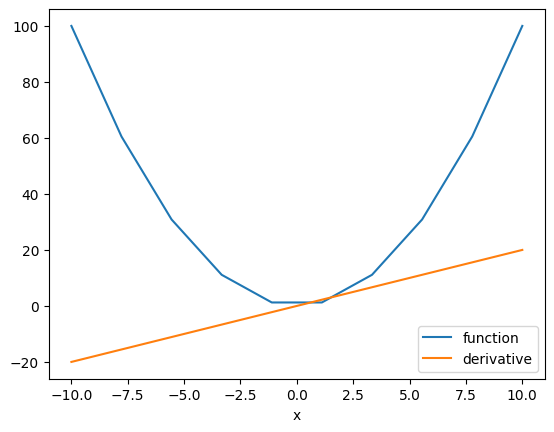

In [84]:
# Take the derivative with respect to multiple value. Plot out the function and its derivative

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

The orange line is the slope of the blue line at the intersection point, which is the derivative of the blue line.


The  method <code> detach()</code>  excludes further tracking of operations in the graph, and therefore the subgraph will not record operations. This allows us to then convert the tensor to a numpy array. To understand the sum operation  <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html">Click Here</a>



<!--Empty Space for separating topics-->


The <b>relu</b> activation function is an essential function in neural networks. We can take the derivative as follows: 


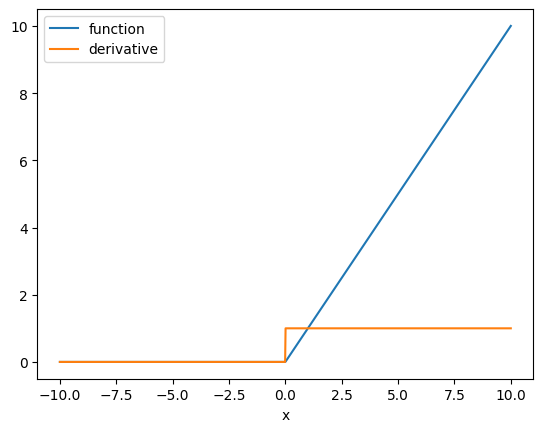

In [85]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


In [86]:
y.grad_fn

# Pytorch Datasets

<h2 id="Simple-dataset">Simple dataset</h2>


Let us try to create our own dataset class.


In [3]:
# These are the libraries will be used for this lab.

import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

In [4]:
# Define class for dataset

class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.transform = transform
     
    # Getter
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length
    def __len__(self):
        return self.len

Now, let us create our <code>toy_set</code> object, and find out the value on index 1 and the length of the inital dataset


In [5]:
# Create Dataset Object. Find out the value on index 1. Find out the length of Dataset Object.

our_dataset = toy_set()
print("Our toy_set object: ", our_dataset)
print("Value on index 0 of our toy_set object: ", our_dataset[0])
print("Our toy_set length: ", len(our_dataset))

Our toy_set object:  <__main__.toy_set object at 0x73f67a40e280>
Value on index 0 of our toy_set object:  (tensor([2., 2.]), tensor([1.]))
Our toy_set length:  100


As a result, we can apply the same indexing convention as a <code>list</code>,
and apply the fuction <code>len</code> on the <code>toy_set</code> object. We are able to customize the indexing and length method by <code>def &#95;&#95;getitem&#95;&#95;(self, index)</code> and <code>def &#95;&#95;len&#95;&#95;(self)</code>.


Now, let us print out the first 3 elements and assign them to x and y:


In [6]:
# Use loop to print out first 3 elements in dataset

for i in range(3):
    x, y=our_dataset[i]
    print("index: ", i, '; x:', x, '; y:', y)

index:  0 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  1 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  2 ; x: tensor([2., 2.]) ; y: tensor([1.])


The dataset object is an Iterable; as a result, we  apply the loop directly on the dataset object 


In [7]:
for x,y in our_dataset:
    print(' x:', x, 'y:', y)

 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 

<h2 id="Transforms">Transforms</h2>


You can also create a class for transforming the data. In this case, we will try to add 1 to x and multiply y by 2:


In [8]:
# Create tranform class add_mult

class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

<!--Empty Space for separating topics-->


Now, create a transform object:.


In [9]:
# Create an add_mult transform object, and an toy_set object

a_m = add_mult()
data_set = toy_set()

Assign the outputs of the original dataset to <code>x</code> and <code>y</code>. Then, apply the transform <code>add_mult</code> to the dataset and output the values as <code>x_</code> and <code>y_</code>, respectively: 


In [10]:
# Use loop to print out first 10 elements in dataset

for i in range(10):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = a_m(data_set[i])
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  3 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  3 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  4 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  4 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  5 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  5 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  6 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  6 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  7 Original x:  tensor([2.,

As the result, <code>x</code> has been added by 1 and y has been multiplied by 2, as <i>[2, 2] + 1 = [3, 3]</i> and <i>[1] x 2 = [2]</i>


<!--Empty Space for separating topics-->


We can apply the transform object every time we create a new <code>toy_set object</code>? Remember, we have the constructor in toy_set class with the parameter <code>transform = None</code>.
When we create a new object using the constructor, we can assign the transform object to the parameter transform, as the following code demonstrates.


In [11]:
# Create a new data_set object with add_mult object as transform

cust_data_set = toy_set(transform = a_m)

This applied <code>a_m</code> object (a transform method) to every element in <code>cust_data_set</code> as initialized. Let us print out the first 10 elements in <code>cust_data_set</code> in order to see whether the <code>a_m</code> applied on <code>cust_data_set</code>


In [12]:
# Use loop to print out first 10 elements in dataset

for i in range(10):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  3 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  3 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  4 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  4 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  5 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  5 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  6 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  6 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  7 Original x:  tensor([2.,

The result is the same as the previous method.


<!--Empty Space for separating topics-->


<h2 id="Compose">Compose</h2>


You can compose multiple transforms on the dataset object. First, import <code>transforms</code> from <code>torchvision</code>:


In [15]:
from torchvision import transforms

Then, create a new transform class that multiplies each of the elements by 100: 


In [16]:
# Create tranform class mult

class mult(object):
    
    # Constructor
    def __init__(self, mult = 100):
        self.mult = mult
        
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x, y
        return sample

Now let us try to combine the transforms <code>add_mult</code> and <code>mult</code>


In [17]:
# Combine the add_mult() and mult()

data_transform = transforms.Compose([add_mult(), mult()])
print("The combination of transforms (Compose): ", data_transform)


The combination of transforms (Compose):  Compose(
)


The new <code>Compose</code> object will perform each transform concurrently as shown in this figure:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/1.3.1_trasform.png" width="500" alt="Compose PyTorch">


In [18]:
data_transform(data_set[0])

(tensor([300., 300.]), tensor([200.]))

In [19]:
x,y=data_set[0]
x_,y_=data_transform(data_set[0])
print( 'Original x: ', x, 'Original y: ', y)

print( 'Transformed x_:', x_, 'Transformed y_:', y_)

Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Transformed x_: tensor([300., 300.]) Transformed y_: tensor([200.])


Now we can pass the new <code>Compose</code> object (The combination of methods <code>add_mult()</code> and <code>mult</code>) to the constructor for creating <code>toy_set</code> object.


In [20]:
# Create a new toy_set object with compose object as transform

compose_data_set = toy_set(transform = data_transform)

Let us print out the first 3 elements in different <code>toy_set</code> datasets in order to compare the output after different transforms have been applied: 


In [21]:
# Use loop to print out first 3 elements in dataset

for i in range(3):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)
    x_co, y_co = compose_data_set[i]
    print('Index: ', i, 'Compose Transformed x_co: ', x_co ,'Compose Transformed y_co: ',y_co)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  0 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])


Let us see what happened on index 0. The original value of <code>x</code> is <i>[2, 2]</i>, and the original value of <code>y</code> is [1]. If we only applied <code>add_mult()</code> on the original dataset, then the <code>x</code> became <i>[3, 3]</i> and y became <i>[2]</i>. Now let us see what is the value after applied both <code>add_mult()</code> and <code>mult()</code>. The result of x is <i>[300, 300]</i> and y is <i>[200]</i>. The calculation which is equavalent to the compose is <i> x = ([2, 2] + 1) x 100 = [300, 300], y = ([1] x 2) x 100 = 200</i>


## Image Dataset


Download the dataset and unzip the files in your data directory, **to download faster this dataset has only 100 samples**:


In [22]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P ./data


--2024-12-25 14:49:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50460 (49K) [application/x-tar]
Saving to: ‘./data/img.tar.gz’

img.tar.gz          100%[===================>]  49.28K  53.5KB/s    in 0.9s    

2024-12-25 14:49:41 (53.5 KB/s) - ‘./data/img.tar.gz’ saved [50460/50460]



In [23]:
!tar -xf ./data/img.tar.gz 

In [24]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv 

--2024-12-25 14:50:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   1.60M   701KB/s    in 2.3s    

2024-12-25 14:50:22 (701 KB/s) - ‘index.csv’ saved [1680905/1680905]



We will use this function in the lab:


In [25]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

The following are the libraries we are going to use for this lab. The <code>torch.manual_seed()</code> is for forcing the random function to give the same number every time we try to recompile it.


In [26]:
# These are the libraries will be used for this lab.

import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

In [27]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

<!--Empty Space for separating topics-->


<h2 id="auxiliary">Auxiliary Functions</h2>


You will use the following function as components of a dataset object, in this section, you will review each of the components independently.


 The path to the csv file with the labels for each image.


In [30]:
# Read CSV file from the URL and print out the first five samples
directory="./data/"
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

You can load the CSV file and convert it into a dataframe , using the Pandas function <code>read_csv()</code> . You can view the dataframe using the method head.


In [31]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


The first column of the dataframe corresponds to the type of clothing. The second column is the name of the image file corresponding to the clothing. You can obtain the path of the first file by using the method  <code> <i>DATAFRAME</i>.iloc[0, 1]</code>. The first argument corresponds to the sample number, and the second input corresponds to the column index. 


In [32]:
# Get the value on location row 0, column 1 (Notice that index starts at 0)
#rember this dataset has only 100 samples to make the download faster  
print('File name:', data_name.iloc[0, 1])

File name: img/fashion0.png


As the class of the sample is in the first column, you can also obtain the class value as follows.


In [33]:
# Get the value on location row 0, column 0 (Notice that index starts at 0.)

print('y:', data_name.iloc[0, 0])

y: Ankle boot


Similarly, You can obtain the file name of the second image file and class type:


In [34]:
# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

File name: img/fashion1.png
class or y: T-shirt


The number of samples corresponds to the number of rows in a dataframe. You can obtain the number of rows using the following lines of code. This will correspond the data attribute <code>len</code>.


In [35]:
# Print out the total number of rows in traing dataset

print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


<h2 id="load_image">Load Image</h2>


To load the image, you need the directory and the image name. You can concatenate the variable <code>train_data_dir</code> with the name of the image stored in a Dataframe. Finally, you will store the result in the variable <code>image_name</code>


In [36]:
# Combine the directory path with file name

image_name =data_name.iloc[1, 1]
image_name

'img/fashion1.png'

we can find the image path:


In [37]:
image_path=os.path.join(directory,image_name)
image_path

'./data/img/fashion1.png'

You can then use the function <code>Image.open</code> to store the image to the variable <code>image</code> and display the image and class .


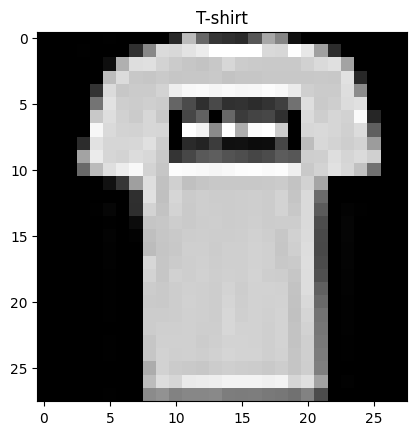

In [38]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

You can repeat the process for the 20th image.


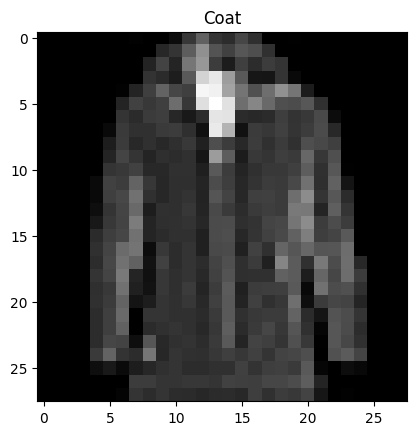

In [39]:
# Plot the 20th image

image_name = data_name.iloc[19, 1]
image_path=os.path.join(directory,image_name)
image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[19, 0])
plt.show()

<hr>


 Create the dataset object.


<h2 id="data_class">Create a Dataset Class</h2>


In this section, we will use the components in the last section to build a dataset class and then create an object.


In [40]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [41]:
# Create the dataset objects
dataset = Dataset(csv_file=csv_file, data_dir=directory)

Each sample of the image and the class y is stored in a tuple <code> dataset[sample]</code> . The image is the first element in the tuple <code> dataset[sample][0]</code> the label or class is the second element in the tuple <code> dataset[sample][1]</code>. For example you can plot the first image and class.


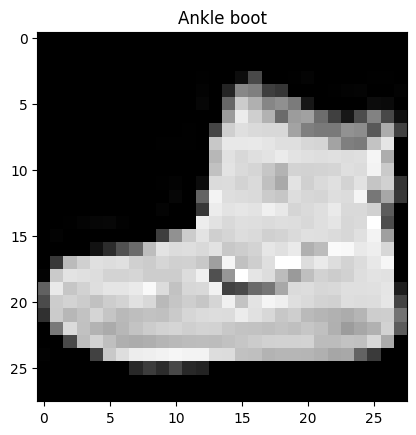

In [42]:
image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

In [43]:
y

'Ankle boot'

Similarly, you can plot the second image: 


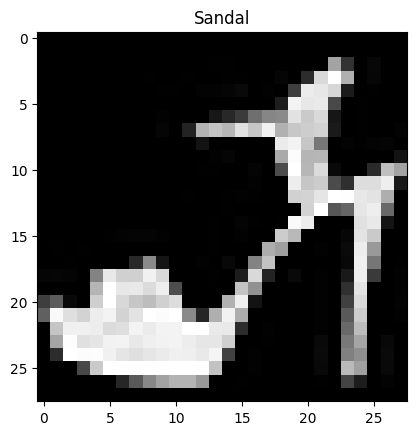

In [44]:
image=dataset[9][0]
y=dataset[9][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

<h2 id="Torchvision"> Torchvision Transforms  </h2>


 
You will focus on the following libraries:


In [45]:
import torchvision.transforms as transforms

We can apply some image transform functions on the dataset object. The iamge can be cropped and converted to a tensor. We can use <code>transform.Compose</code> we learned from the previous lab to combine the two transform functions.


In [46]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)


The shape of the first element tensor:  torch.Size([1, 20, 20])


We can see the image is now 20 x 20


<!--Empty Space for separating topics-->


Let us plot the first image again. Notice we see less of the shoe.


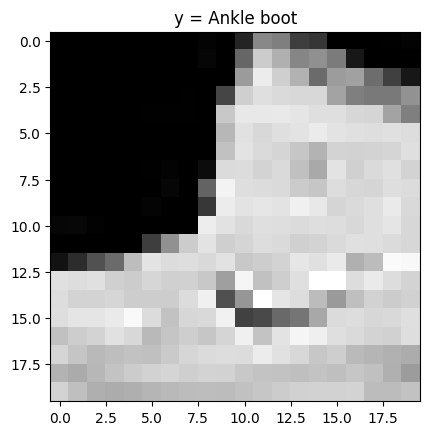

In [47]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

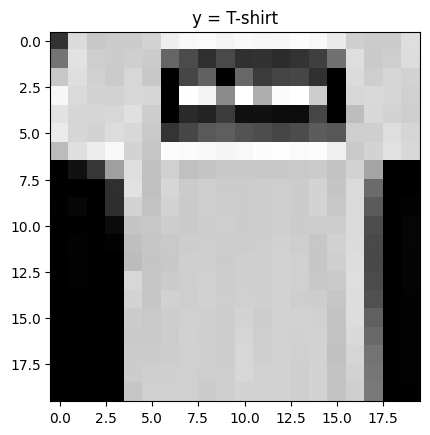

In [48]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

In the below example, we Vertically flip the image, and then convert it to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.


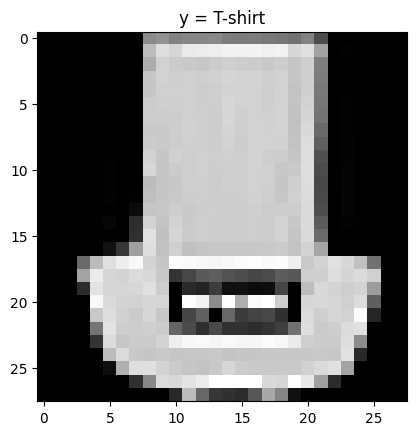

In [49]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])

## Prebuilt Datasets in Torch Vision

The following are the libraries we are going to use for this lab. The <code>torch.manual_seed()</code> is for forcing the random function to give the same number every time we try to recompile it.


In [50]:
# These are the libraries will be used for this lab.
import torch 
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

This is the function for displaying images.


In [51]:
# Show data by diagram

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

<!--Empty Space for separating topics-->


<a name="Prebuilt_Dataset"><h2 id="Prebuilt_Dataset">Prebuilt Datasets</h2></a>


You will focus on the following libraries: 


In [52]:
# Run the command below when you do not have torchvision installed
# !mamba install -y torchvision

import torchvision.transforms as transforms
import torchvision.datasets as dsets

We can import a prebuilt dataset. In this case, use MNIST. You'll work with several of these parameters later by placing a transform object in the argument <code>transform</code>.


In [54]:
# Import the prebuilt dataset into variable dataset


dataset = dsets.MNIST(
    root = './data',  
    download = True, 
    transform = transforms.ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [02:11<00:00, 75.6kB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:01<00:00, 28.2kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.30MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 3.45MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Each element of the dataset object contains a tuple. Let us see whether the first element in the dataset is a tuple and what is in it.


In [55]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?

print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  5
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


As shown in the output, the first element in the tuple is a cuboid tensor. As you can see, there is a dimension with only size 1, so basically, it is a rectangular tensor.<br>
The second element in the tuple is a number tensor, which indicate the real number the image shows. As the second element in the tuple is <code>tensor(7)</code>, the image should show a hand-written 7.


<!--Empty Space for separating topics-->


Let us plot the first element in the dataset:


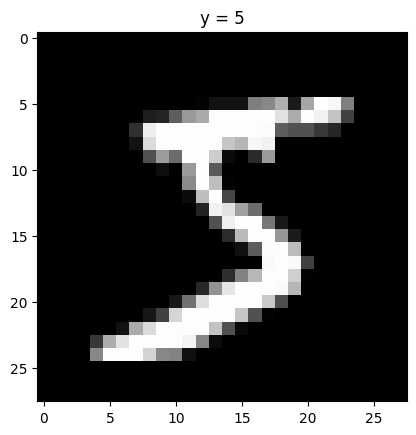

In [56]:
# Plot the first element in the dataset

show_data(dataset[0])

As we can see, it is a 7.


Plot the second sample:   


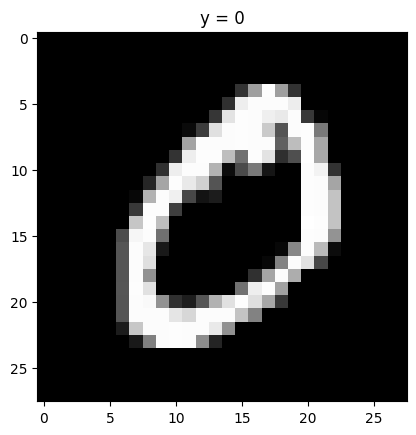

In [57]:
# Plot the second element in the dataset

show_data(dataset[1])

<!--Empty Space for separating topics-->


<a name="Torchvision"><h2 id="Torchvision"> Torchvision Transforms  </h2></a>


We can apply some image transform functions on the MNIST dataset.


As an example, the images in the MNIST dataset can be cropped and converted to a tensor. We can use <code>transform.Compose</code> we learned from the previous lab to combine the two transform functions.


In [58]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


We can see the image is now 20 x 20 instead of 28 x 28.


<!--Empty Space for separating topics-->


Let us plot the first image again. Notice that the black space around the <b>7</b> become less apparent.


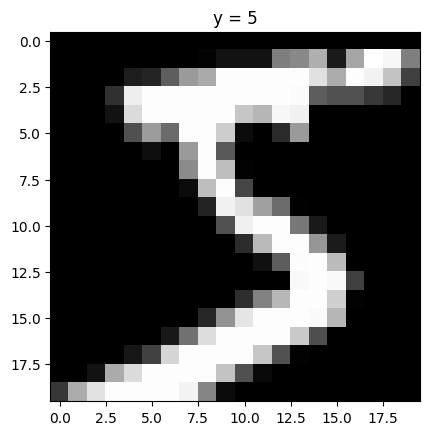

In [59]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

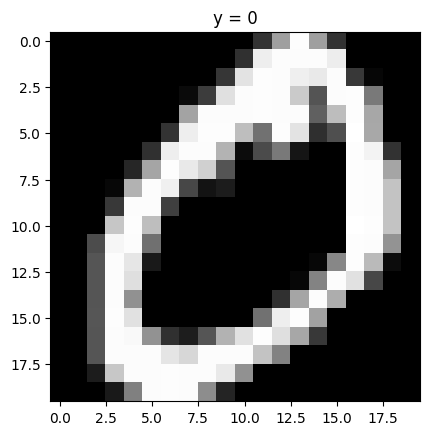

In [60]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

In the below example, we horizontally flip the image, and then convert it to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.


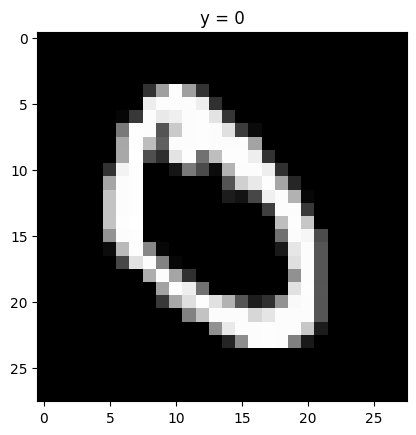

In [61]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = fliptensor_data_transform)
show_data(dataset[1])